<a href="https://colab.research.google.com/github/akalinow/Modern_Particle_Physics_Experiments/blob/2022_2023/11_Machine_learning/11_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - part II 

## Setup the environment

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np
import pandas as pd

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_squared_error

#Models
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# An universal approximation theorem [Cybenko, 1989](https://link.springer.com/article/10.1007/BF02551274):

Let's define a ``neuron`` function on $R^{n} \rightarrow R$:
$$
\huge{
 f_{k}(\theta_{k}, x) = A(\sum_{i=1}^{N} \theta_{i,k} x_{i} + \beta_{k})
}
$$

where `A` - activation function: any function of a single argument that fulfills requirements:

$$
\huge{
 \lim_{x\rightarrow -\infty} f(x) \rightarrow 0 \\
 \lim_{x\rightarrow +\infty} f(x) \rightarrow 1 \\
}
$$

**Theorem**: every continuous function on $R^{n} \rightarrow R$ can be approximated in basis of neural functions (=one layer of neurons).

$$
\huge{
y(x) \simeq \sum_{k} w_{k} f_{k}(\theta_{k}, x)
}
$$

### Activation functions:

* siogmoid: 
$$
\huge{
f(x) = \frac{1}{1+e^{-x}}
}
$$
* rectified linear unit (ReLu):
$$
\huge{
f(x) = 
\begin{cases}
    0       & \quad \text{if } x<0\\
    x  & \quad \text{if } x \geq 0
  \end{cases}
}
$$

**Note**: ReLu function does not fulfill the Cybenko theorem, but there are other theorems showing that networks with ReLu are also universal approximators.

# The training

How the parameters $(\theta_{k}, w_{k})$ of the model are found? 

`We calculate gradient vector of the loss function wrt. the parameters, and go opposite to the gradient to the minimum of the loss function.`

The algorithm is as follows:

1) define starting values for $\theta$ parameters: `init_theta`. Ussually `init_theta` are taken random.

2) select a sub sample of examples to be used for the loss function calculation: a `batch`

3) calculate the loss function gradient.

4) update the $\theta$ parameter proportionally to the gradient, with proportionality parameter $\alpha$ ("learning rate"):
$$
$$
$$
\huge{
 \theta_{new} = \theta_{old} - \alpha \cdot \nabla_{\theta} L
}
$$

In reality more complicated algoriuthms are used, but the general idea is the same.

5) loop with batches through the whole dataset. One pass through the whole dataset is called an `epoch`

6) repeat reading the whole dataset many times.

The training loop is implemented within any package used for machine learning. The most widealy used packages are:

* [scikit-learn](https://scikit-learn.org/stable/) - "Simple and efficient tools for predictive data analysis" - a very good library for begginers. Contains a large set of ML algrotihms, with easy to use interface for training and inference 
* [PyTorch](https://pytorch.org/) - an open source machine learning framework developed by Meta AI (Facebook)
* [TensorFlow](https://www.tensorflow.org/) - Google machine learning framework

## Regression example

**Please:**

prepare a dataset for a 1D regression task: 
$$
\huge{
f(x) = y
}
$$

where:

$X$ - features, in range $[0, 2\pi]$

$y$ - targets

* prepare a list of random 10 000 values of $x$. Make sure the shape of the X is `(-1,1)`
* prepare a set of y values, definded as $y = \sin(x)$
* split the dataset into training and testng subsets in proportions 8:2 - use the `train_test_split()` function - check documentation how to use it with X and Y arrays
* plot y vs x

Train labels shape: (8000,)
Test labels shape: (2000,)
Train features shape: (8000, 1)
Test features shape: (2000, 1)


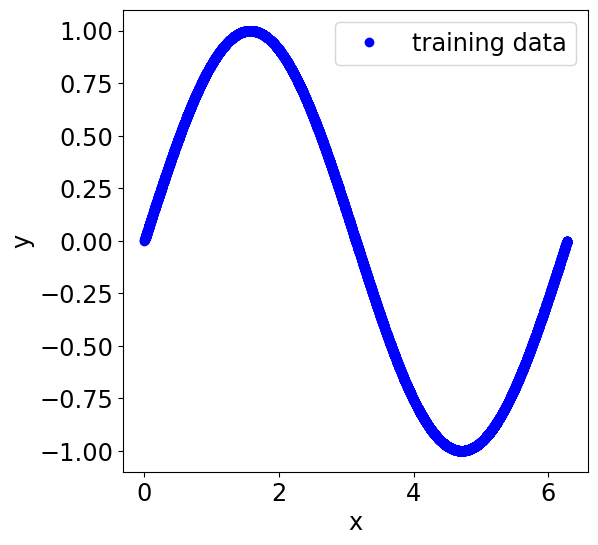

In [3]:
##BEGIN_SOLUTION
nPoints = 10000
minX = 0.0
maxX = 2.0*np.pi
X = np.random.default_rng().uniform(minX, maxX, nPoints)
y = np.sin(X)

X = np.reshape(X, (-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(colored("Train labels shape:","blue"), y_train.shape)
print(colored("Test labels shape:","blue"), y_test.shape)

print(colored("Train features shape:","blue"), X_train.shape)
print(colored("Test features shape:","blue"), X_test.shape)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(X_train,y_train, "bo", label="training data")
ax.set_xlabel('x')
ax.set_ylabel('y');
ax.legend()
##END_SOLUTION
pass

We will use a simple neural netowrk (NN) sometimes called multi layer perceptron (MLP) to reconstruct the target values.
The model uses a network of connected units (neurons), hence the name: neural network

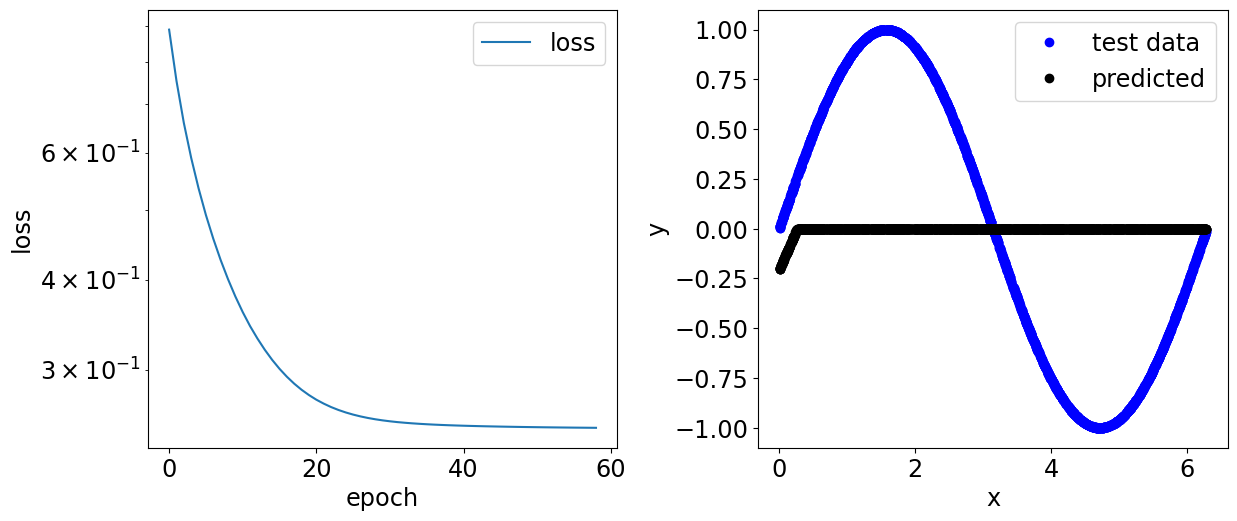

In [4]:
#create a model object.
hidden_layer_sizes = (1)
model =  MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes = hidden_layer_sizes)

# fit (train) the model with training data
model.fit(X_train, y_train)

loss_history = model.loss_curve_

# calculate the model response on the test data
y_pred = model.predict(X_test)

#plot true and calculated y values
fig, axes = plt.subplots(1,2, figsize=(12, 6))

axes[0].plot(loss_history, label="loss")
axes[0].legend()
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].set_yscale('log')

axes[1].plot(X_test,y_test, "bo", label="test data")
axes[1].plot(X_test,y_pred, "o", color='black', label="predicted")
axes[1].legend()
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)  

The result is not prefect, even judging by eye. We can modify the architecture of our network:

* number of neurons in hidden layers: `hidden_layer_sizes`
* learning rate value: `learning_rate_init`
* learning rate scheme: `learning_rate` 
* number of events in a single batch: `batch_size` 
* criterium for stopping the learning process: see the `tol` parameter

**Please:**

* calculate the mean squared error (MSE) metric for the model response on the test data
* modify the network architecture until you get `MSE`<$10^{-5}$


**Hints:** 
* use `mean_squared_error()` function from sklearn package
* try to understand the loss function behaviour - the loss function is almost equal to MSE

In [ ]:
%%time

...
pass

## Data preprocessing

Before a ML model will be trained a number of preparations can bne made to the data.
A most important one is scaling the inputs to common range. Here we use a class `StandardScaler` to standarize the features:

$$
\large{
x_{std} = \frac{x - \mu_{x}}{\sigma_{x}}
}
$$

Ussually application of scaling causes the training process to converge faster. We will use a `StandardScaler` class:
```Python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.transform(X_test)
```

MSE on the training data: 4.428963670691869e-07
MSE on the test data: 4.539371439377892e-07
CPU times: user 16.2 s, sys: 65.1 ms, total: 16.2 s
Wall time: 4.07 s


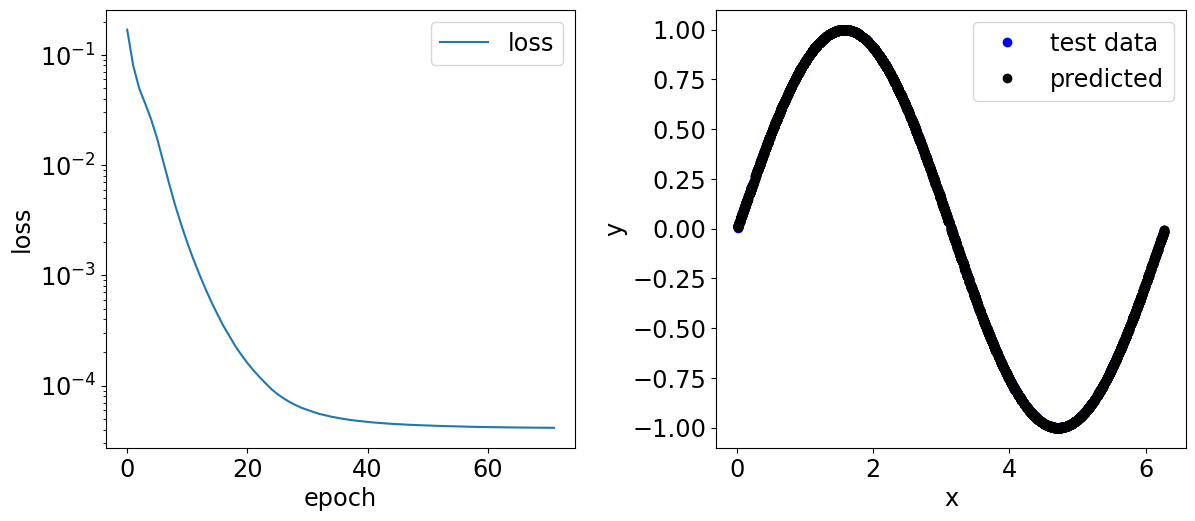

In [5]:
%%time

##BEGIN_SOLUTION
hidden_layer_sizes = (128,128,128)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.transform(X_test)

model =  MLPRegressor(random_state=1, max_iter=500, 
                      hidden_layer_sizes=hidden_layer_sizes,
                      learning_rate_init = 1E-4,
                      tol=1E-7
                     )
model.fit(X_std_train, y_train)
y_pred = model.predict(X_std_train)
mse = mean_squared_error(y_train, y_pred)
print(colored("MSE on the training data:", "blue"),mse)

loss_history = model.loss_curve_
y_pred = model.predict(X_std_test)
mse = mean_squared_error(y_test, y_pred)
print(colored("MSE on the test data:", "blue"),mse)

fig, axes = plt.subplots(1,2, figsize=(12, 6))

axes[0].plot(loss_history, label="loss")
axes[0].legend()
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].set_yscale('log')

axes[1].plot(X_test,y_test, "bo", label="test data")
axes[1].plot(X_test,y_pred, "o", color='black', label="predicted")
axes[1].legend()
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

# Homework

[Dataset from the ATLAS Higgs Boson Machine Learning Challenge 2014](https://opendata.cern.ch/record/328)

The dataset has been built from official ATLAS full-detector simulation of $pp$ collisions and contains a mixture of events:
- $H \rightarrow \tau\tau$, $\leftarrow$ signal
- $Z \rightarrow \tau\tau$, 
- $Z \rightarrow ll$
- $W \rightarrow e\tau$ or $\mu\tau$.

**Your task is to build a classifier that will be able to select the $H \rightarrow \tau\tau$ events from the background.**

**Please:**

* dowlonad the data for HiggsBoson_ML_challenge
* sample at least 10 000 examples from it (you can use more if you think it will help)
* drop unnecessary columns: 
```Python
['KaggleSet','KaggleWeight','Weight', 'EventId']
```
* prepare labels in digital form: Signal $\rightarrow$1, Background$\rightarrow$0. Make sure the labels shape is `(-1,1)`
* normalize the input features
* split the dataset into training and testing subsets in proportions 8:2
* (optional) prepare training dataset in a way that is has the same proprtions of signal and background
* print to the screen shapes of training and testing features and labels
* create and train a NN classifier using the `MLPClassifier` class
* for the **train** data: 
    * plot loss history 
    * plot confusion matrix with normalisation that allows to read the FPR and TPR
    * print the accuracy
* for the **test** data:
    * plot confusion matrix with normalisation that allows to read the FPR and TPR
    * print the accuracy  


**Note:** to get positive mark you have to find a model that gives accuracy at least **0.8** on the training sample, and **0.75** on the test sample

In [44]:
##Cell for loading the data (to be execured once)

filePath = 'https://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz'
filePath = 'https://akalinow.web.cern.ch/akalinow/HiggsBoson_ML_challenge/atlas-higgs-challenge-2014-v2.csv.gz'

df = pd.read_csv(filePath)

df=df.sample(n=10000, random_state=1)

df['Label'] = df['Label']=='s'
df['Label'] = df['Label'].astype(int)

df_train, df_test = train_test_split(df, test_size = 0.25, random_state=42)
y_train = df_train['Label'].to_numpy()
y_test = df_test['Label'].to_numpy()

df_train.drop(columns = ['KaggleSet','KaggleWeight','Weight', 'EventId', 'Label'], inplace = True)
df_test.drop(columns = ['KaggleSet','KaggleWeight','Weight', 'EventId', 'Label'], inplace = True)





print(colored("Train features shape:","blue"), df_train.shape)
print(colored("Test features shape:","blue"), df_test.shape)

Train features shape: (7500, 30)
Test features shape: (2500, 30)


In [54]:
%%time
##Cell for training and testing a model (to be executed many times)


#df = df.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(2))


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()ç


x_train = df_train.to_numpy()
x_test = df_test.to_numpy()


X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.transform(X_test)



classifier =  MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes = hidden_layer_sizes)

clf = classifier.fit(X_std_train, y_train)

y_pred = clf.predict_proba(x_test)
print(clf.score(X_std_test, y_test))



...

SyntaxError: invalid syntax (<unknown>, line 8)

array([0.97450913, 0.02549087])